In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
import math

In [ ]:
def get_data_from_csv(path):
    df = pd.read_csv(path)
    data = df.to_numpy().astype(float)
    x_train = data[:,[0,1,2,3,4,5,6,7,8,9]]
    y_train = data[:,[10]]
    return x_train, y_train

In [ ]:
x, y = get_data_from_csv(r"C:\Users\Bisma\Downloads\housepricedata.csv")

In [ ]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
x_t = min_max_scaler.fit_transform(x)


In [ ]:

#Part_1
import tensorflow as tf
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,min_delta=10**(-4))

#Network Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'),
    #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
    #tf.keras.layers.Dropout(.5),
    #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
    #tf.keras.layers.Dropout(.5),
    #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
    #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
    #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
    tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal')
])
#learning Rate Schedule
initial_learning_rate = 0.01
def lr_step_decay(epoch, lr):
    drop_rate = 0.9
    epochs_drop = 10.0
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
#Model Formation
model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
             loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=['accuracy'])



In [ ]:
print(y.shape)

(1460, 1)


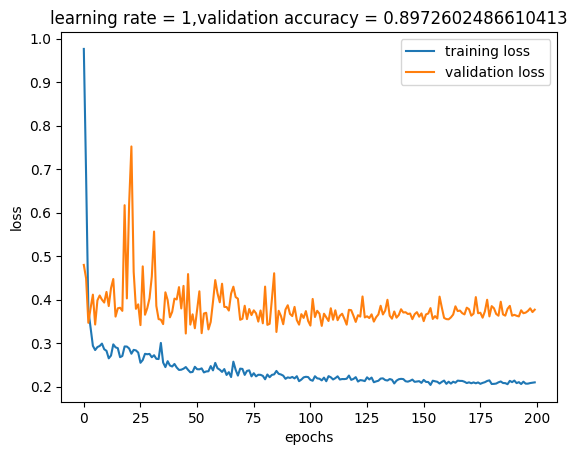

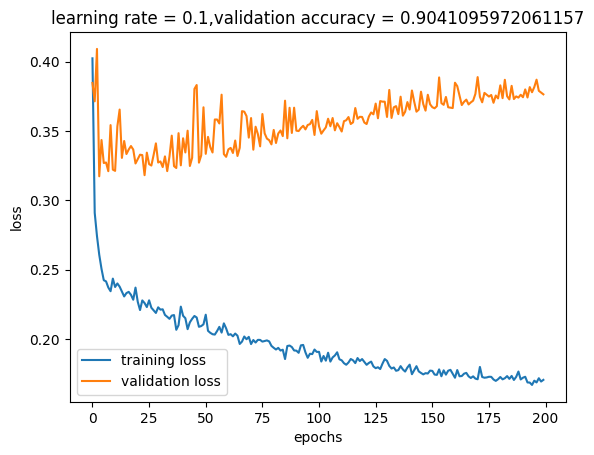

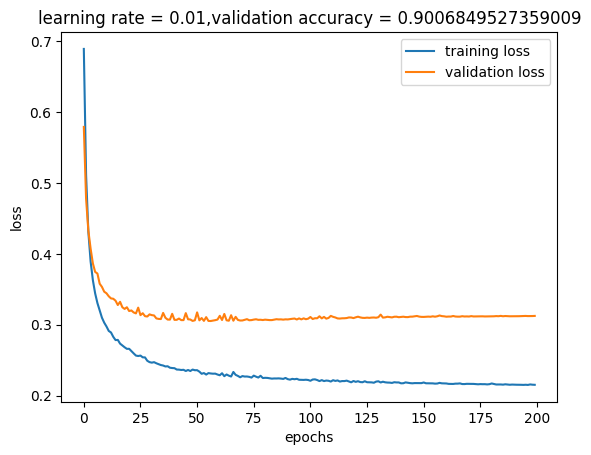

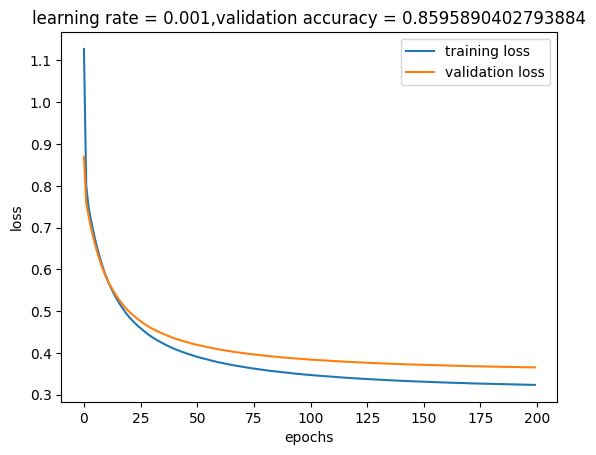

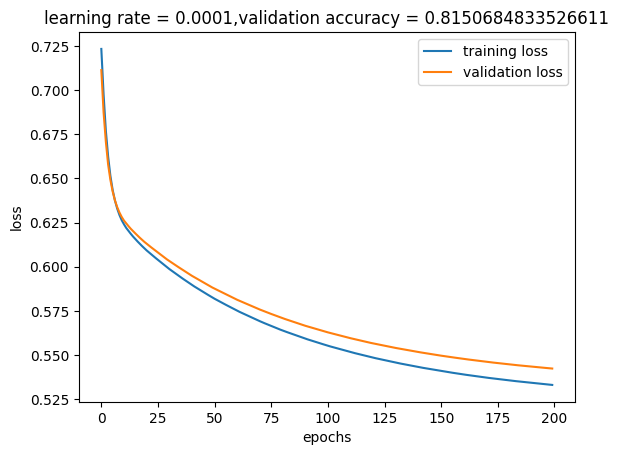

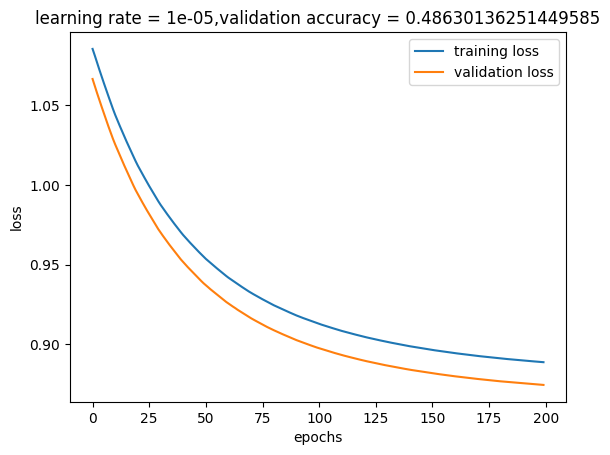

In [ ]:
#Part2-Varying learning Rates:
LR=[1,0.1,0.01,0.001,0.0001,0.00001]

for lr in LR:
    #Network Architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal')
    ])
    initial_learning_rate = lr
    def lr_step_decay(epoch, lr):
        drop_rate = 0.9
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
    #Model Formation
    model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    history=model.fit(x_t, y, epochs=200,verbose=0,validation_split=0.2,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=0)])#,callbacks=[callback])#,callbacks=[callback])  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('learning rate = '+str(lr)+",validation accuracy = "+str(history.history.get('val_accuracy')[-1]))
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend(["training loss","validation loss"])
    plt.show()



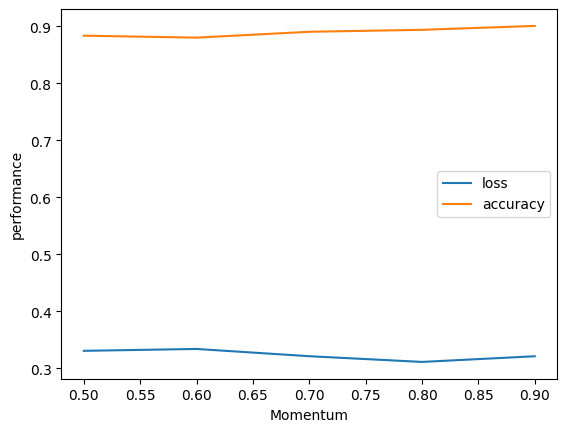

In [ ]:
#extra Analysis Momentum
MN=[0.5,0.6,0.7,0.8,0.9]
acc=[]
loss=[]
for mn in MN:
    #Network Architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal')
    ])
    initial_learning_rate = 0.01
    def lr_step_decay(epoch, lr):
        drop_rate = 0.9
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
    #Model Formation
    model.compile(tf.keras.optimizers.SGD(momentum=mn,nesterov=True),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    history=model.fit(x_t, y, epochs=100,verbose=0,validation_split=0.2,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=0)])#,callbacks=[callback])#,callbacks=[callback])  
    acc.append(history.history.get('val_accuracy')[-1])
    loss.append(history.history.get('val_loss')[-1])
plt.plot(MN,loss)
plt.plot(MN,acc)
plt.legend(["loss",'accuracy'])
plt.xlabel("Momentum")
plt.ylabel('performance')
plt.show()

In [ ]:
print(*loss)
print(*acc)

0.3460695147514343 0.32483479380607605 0.32755494117736816 0.3131980299949646 0.30764392018318176 0.316887229681015 0.322482168674469
0.8561643958091736 0.8801369667053223 0.8869863152503967 0.8938356041908264 0.8904109597206116 0.8972602486610413 0.9075342416763306


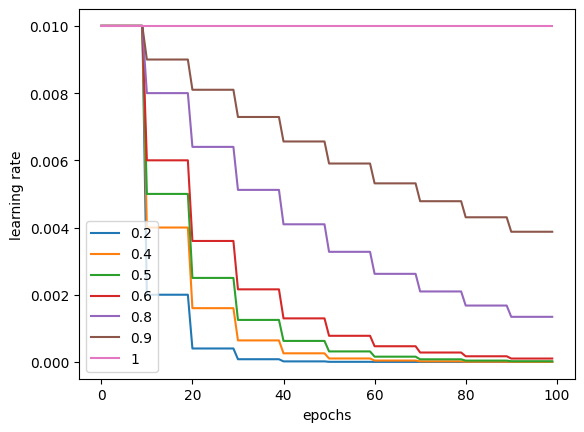

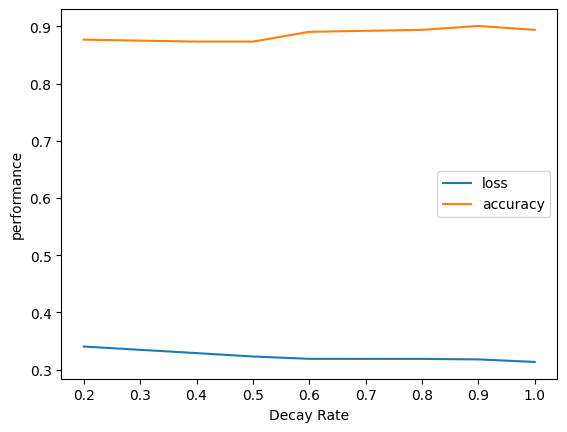

In [ ]:
#Part 3-Varying Learning rate schedules
DR=[0.2,0.4,0.5,0.6,0.8,0.9,1]
acc=[]
loss=[]
for dr in DR:
    #Network Architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal')
    ])
    initial_learning_rate = 0.01
    def lr_step_decay(epoch, lr):
        drop_rate = dr
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
    #Model Formation
    model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    history=model.fit(x_t, y, epochs=100,verbose=0,validation_split=0.2,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=0)])#,callbacks=[callback])#,callbacks=[callback])  
    acc.append(history.history.get('val_accuracy')[-1])
    loss.append(history.history.get('val_loss')[-1])
    plt.plot(history.history['lr'])
plt.xlabel('epochs')
plt.ylabel('learning rate')
plt.legend(DR)
plt.show()
plt.plot(DR,loss)
plt.plot(DR,acc)
plt.legend(["loss",'accuracy'])
plt.xlabel("Decay Rate")
plt.ylabel('performance')
plt.show()

In [ ]:
print(*loss)
print(*acc)

0.340237021446228 0.3287663757801056 0.32284048199653625 0.3187701404094696 0.3186577260494232 0.3177538514137268 0.31334924697875977
0.8767123222351074 0.8732876777648926 0.8732876777648926 0.8904109597206116 0.8938356041908264 0.9006849527359009 0.8938356041908264


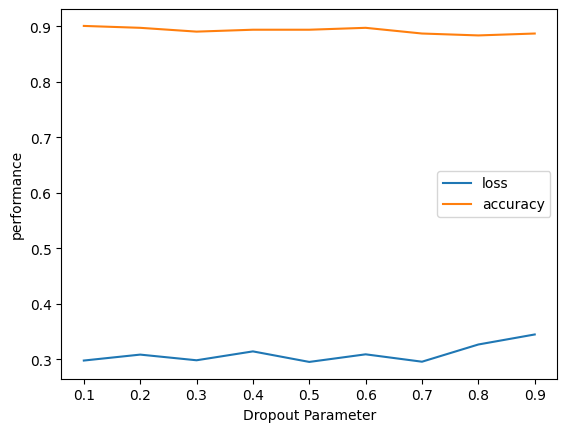

In [ ]:

#Part4- Dropout Regularisation:
DR=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
loss=[]
acc=[]
for dr in DR:
    #Network Architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
        tf.keras.layers.Dropout(dr),
        #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal')
    ])
    initial_learning_rate = 0.01
    def lr_step_decay(epoch, lr):
        drop_rate = 0.9
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
    #Model Formation
    model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    history=model.fit(x_t, y, epochs=100,verbose=0,validation_split=0.2,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=0)])#,callbacks=[callback])#,callbacks=[callback])  
    acc.append(history.history.get('val_accuracy')[-1])
    loss.append(history.history.get('val_loss')[-1])
plt.plot(DR,loss)
plt.plot(DR,acc)
plt.legend(["loss",'accuracy'])
plt.xlabel("Dropout Parameter")
plt.ylabel('performance')
plt.show()

In [ ]:
print(*loss)
print(*acc)

0.2976699471473694 0.308362752199173 0.2981520891189575 0.31416967511177063 0.29517611861228943 0.3088672459125519 0.2955651879310608 0.3265917897224426 0.3446514904499054
0.9006849527359009 0.8972602486610413 0.8904109597206116 0.8938356041908264 0.8938356041908264 0.8972602486610413 0.8869863152503967 0.8835616707801819 0.8869863152503967


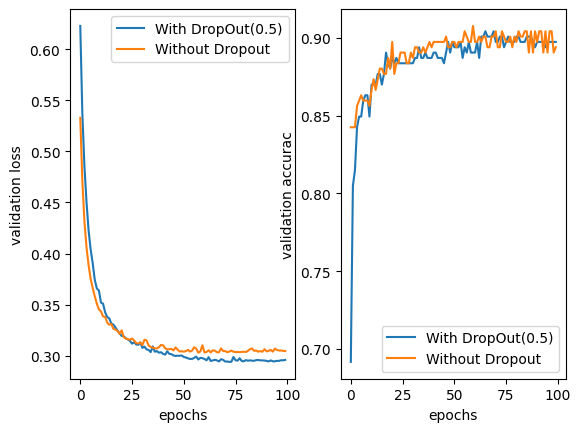

In [ ]:
#Part 4-Comparison on validation performance with and without drop out
DR=[0.5,0]
loss=[]
acc=[]
for dr in DR:
    #Network Architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
        tf.keras.layers.Dropout(dr),
        #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal')
    ])
    initial_learning_rate = 0.01
    def lr_step_decay(epoch, lr):
        drop_rate = 0.9
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
    #Model Formation
    model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    history=model.fit(x_t, y, epochs=100,verbose=0,validation_split=0.2,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=0)])#,callbacks=[callback])#,callbacks=[callback])  
    acc.append(history.history.get('val_accuracy')[-1])
    loss.append(history.history.get('val_loss')[-1])
    plt.subplot(1,2,1)
    plt.plot(history.history['val_loss'])
    plt.subplot(1,2,2)
    plt.plot(history.history['val_accuracy'])
plt.subplot(1,2,1)
plt.legend(["With DropOut(0.5)",'Without Dropout'])
plt.xlabel("epochs")
plt.ylabel('validation loss')
plt.subplot(1,2,2)
plt.legend(["With DropOut(0.5)",'Without Dropout'])
plt.xlabel("epochs")
plt.ylabel('validation accurac')
plt.show()

In [ ]:
print(*loss)
print(*acc)

0.2959831655025482 0.30465734004974365
0.8972602486610413 0.8938356041908264


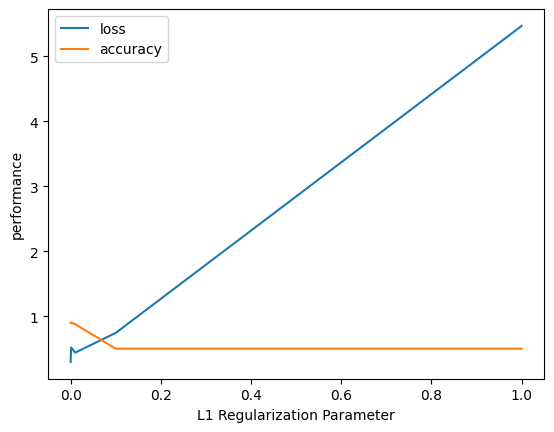

In [ ]:
#Part 5 Subpart-1 L1 Regularizer
DR=[0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
loss=[]
acc=[]
for dr in DR:
    #Network Architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal',kernel_regularizer=tf.keras.regularizers.L1(dr)),
        #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dropout(0.5),
        #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal',kernel_regularizer=tf.keras.regularizers.L1(dr))
    ])
    initial_learning_rate = 0.01
    def lr_step_decay(epoch, lr):
        drop_rate = 0.9
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
    #Model Formation
    model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    history=model.fit(x_t, y, epochs=100,verbose=0,validation_split=0.2,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=0)])#,callbacks=[callback])#,callbacks=[callback])  
    acc.append(history.history.get('val_accuracy')[-1])
    loss.append(history.history.get('val_loss')[-1])
plt.plot(DR,loss)
plt.plot(DR,acc)
plt.legend(["loss",'accuracy'])
plt.xlabel("L1 Regularization Parameter")
plt.ylabel('performance')
plt.show()

In [ ]:
print(*loss)
print(*acc)

0.2965141832828522 0.3203554153442383 0.35873275995254517 0.5188708901405334 0.4396136701107025 0.7434321045875549 5.46613883972168
0.8972602486610413 0.9006849527359009 0.8972602486610413 0.9006849527359009 0.8767123222351074 0.5 0.5


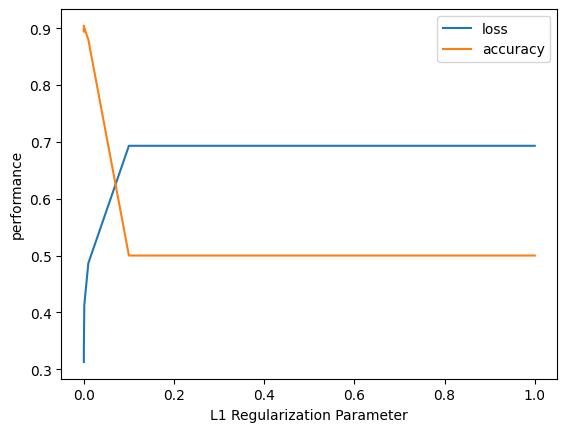

In [ ]:
#Part 5 Subpart-2 L2 Regularizer
DR=[0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
loss=[]
acc=[]
for dr in DR:
    #Network Architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal',kernel_regularizer=tf.keras.regularizers.L2(dr)),
        #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dropout(0.5),
        #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal',kernel_regularizer=tf.keras.regularizers.L2(dr))
    ])
    initial_learning_rate = 0.01
    def lr_step_decay(epoch, lr):
        drop_rate = 0.9
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
    #Model Formation
    model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    history=model.fit(x_t, y, epochs=100,verbose=0,validation_split=0.2,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=0)])#,callbacks=[callback])#,callbacks=[callback])  
    acc.append(history.history.get('val_accuracy')[-1])
    loss.append(history.history.get('val_loss')[-1])
plt.plot(DR,loss)
plt.plot(DR,acc)
plt.legend(["loss",'accuracy'])
plt.xlabel("L2 Regularization Parameter")
plt.ylabel('performance')
plt.show()

In [ ]:
print(*loss)
print(*acc)

0.3127584457397461 0.3139006495475769 0.3351294696331024 0.41228699684143066 0.48647230863571167 0.6931502223014832 0.6931518316268921
0.9041095972061157 0.8972602486610413 0.8938356041908264 0.9006849527359009 0.8801369667053223 0.5 0.5


Epoch 1/100
37/37 [==============================] - 1s 11ms/step - loss: 0.6072 - accuracy: 0.6943 - val_loss: 0.5180 - val_accuracy: 0.8493 - lr: 0.0100
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4668 - accuracy: 0.8425 - val_loss: 0.4536 - val_accuracy: 0.8493 - lr: 0.0100
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 0.4147 - accuracy: 0.8510 - val_loss: 0.4232 - val_accuracy: 0.8459 - lr: 0.0100
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8639 - val_loss: 0.4004 - val_accuracy: 0.8562 - lr: 0.0100
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 0.3584 - accuracy: 0.8647 - val_loss: 0.3850 - val_accuracy: 0.8664 - lr: 0.0100
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8699 - val_loss: 0.3727 - val_accuracy: 0.8596 - lr: 0.0100
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 0.

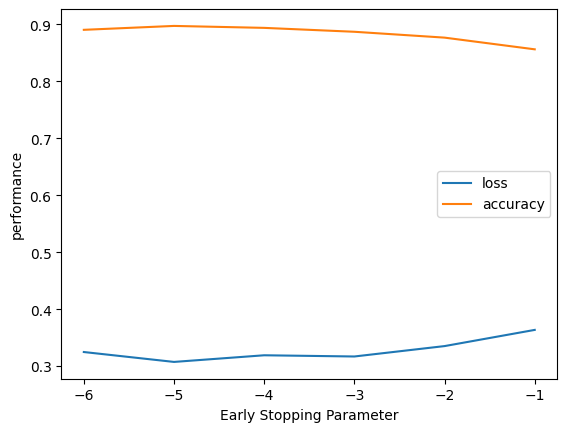

In [ ]:
#Part 5 Early Stopping
min_delta=[-1,-2,-3,-4,-5,-6]
loss=[]
acc=[]
for dr in min_delta:
    #Network Architecture
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,min_delta=10**dr,mode="auto")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dropout(0.5),
        #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal')
    ])
    initial_learning_rate = 0.01
    def lr_step_decay(epoch, lr):
        drop_rate = 0.9
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
    #Model Formation
    model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    history=model.fit(x_t, y, epochs=100,verbose=1,validation_split=0.2,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=0),callback])#,callbacks=[callback])#,callbacks=[callback])  
    acc.append(history.history.get('val_accuracy')[-1])
    loss.append(history.history.get('val_loss')[-1])
plt.plot(min_delta,loss)
plt.plot(min_delta,acc)
plt.legend(["loss",'accuracy'])
plt.xlabel("Early Stopping Parameter")
plt.ylabel('performance')
plt.show()


In [ ]:
print(*loss)


0.36356890201568604 0.33513763546943665 0.31688162684440613 0.3190126419067383 0.30734339356422424 0.324720561504364


In [ ]:
print(*acc)

0.8561643958091736 0.8767123222351074 0.8869863152503967 0.8938356041908264 0.8972602486610413 0.8904109597206116


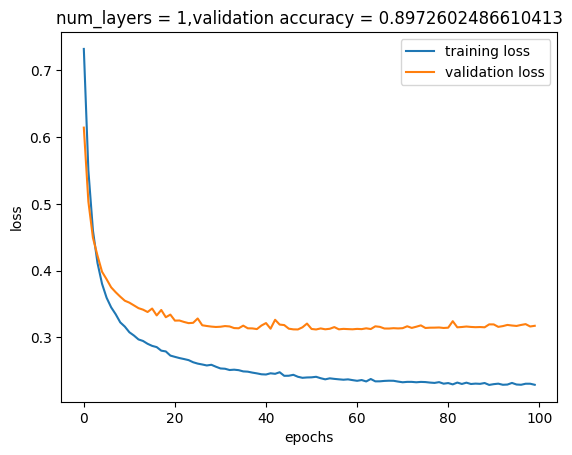

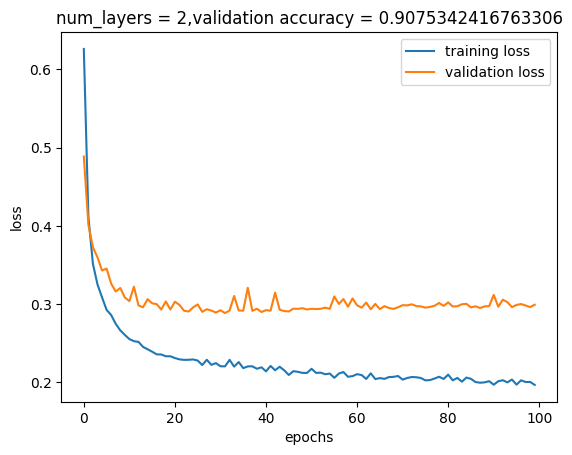

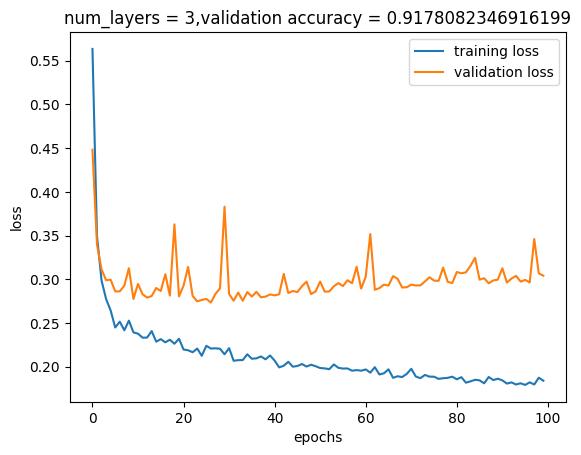

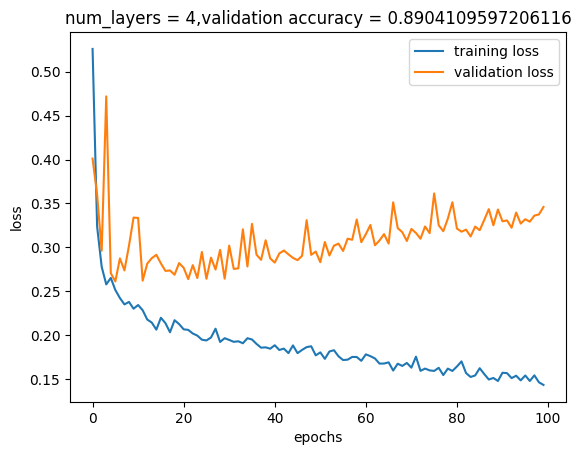

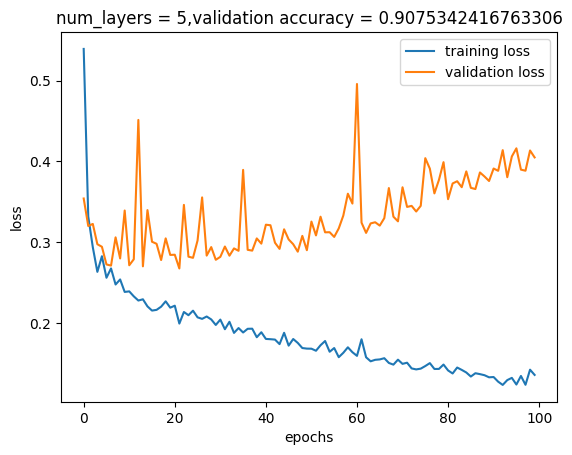

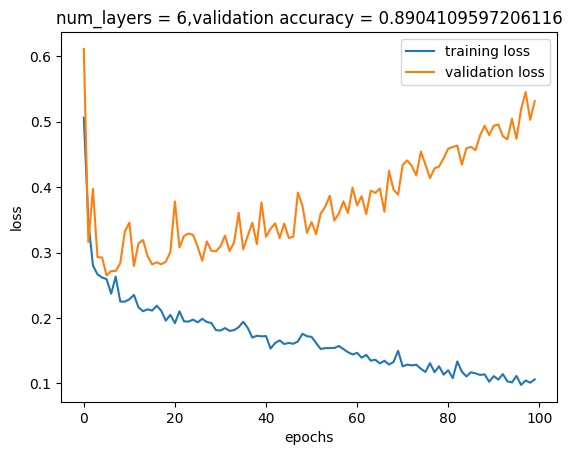

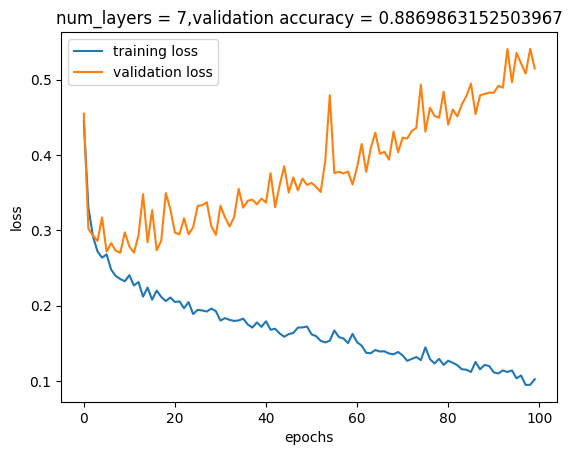

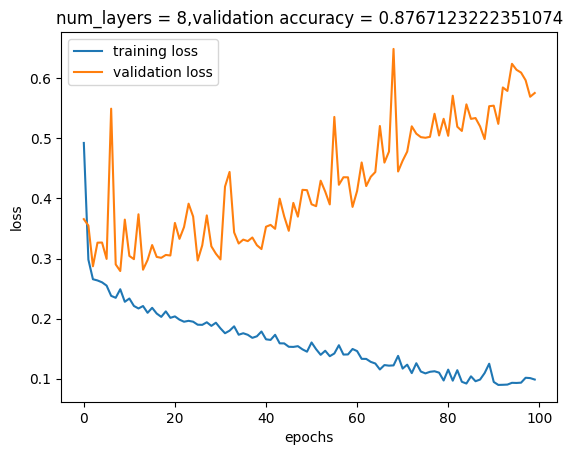

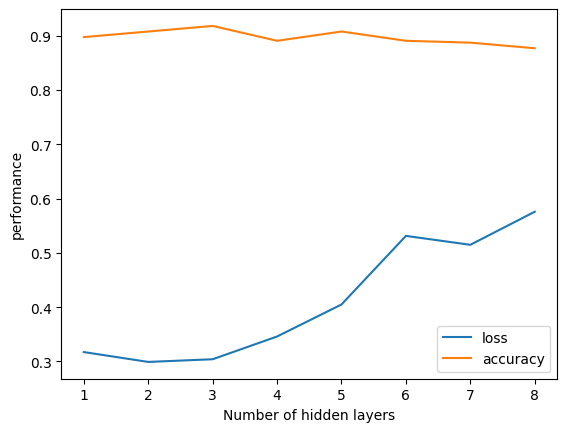

In [ ]:
#Part 6-Effect of Increasing No. of Hidden layers
num_layers=[1,2,3,4,5,6,7,8]
loss=[]
acc=[]
for dr in num_layers:
    #Network Architecture
    #callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,min_delta=10**-5)
    
    model = tf.keras.Sequential([
        #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dropout(0.5),
        #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        #tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal')
    ])
    for i in range(dr):
        model.add(tf.keras.layers.Dense(100,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'))
        #model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'))
    initial_learning_rate = 0.01
    def lr_step_decay(epoch, lr):
        drop_rate = 0.9
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
    #Model Formation
    model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    history=model.fit(x_t, y, epochs=100,verbose=0,validation_split=0.2,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=0)])#,callbacks=[callback])#,callbacks=[callback])  
    acc.append(history.history.get('val_accuracy')[-1])
    loss.append(history.history.get('val_loss')[-1])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('num_layers = '+str(dr)+",validation accuracy = "+str(history.history.get('val_accuracy')[-1]))
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend(["training loss","validation loss"])
    plt.show()
plt.plot(num_layers,loss)
plt.plot(num_layers,acc)
plt.legend(["loss",'accuracy'])
plt.xlabel("Number of hidden layers")
plt.ylabel('performance')
plt.show()

In [ ]:
print(*acc)

0.8972602486610413 0.9075342416763306 0.9178082346916199 0.8904109597206116 0.9075342416763306 0.8904109597206116 0.8869863152503967 0.8767123222351074


In [ ]:
print(*loss)

0.3173372745513916 0.2991882264614105 0.30411049723625183 0.34600022435188293 0.4049187898635864 0.5312150120735168 0.5148325562477112 0.5756857991218567


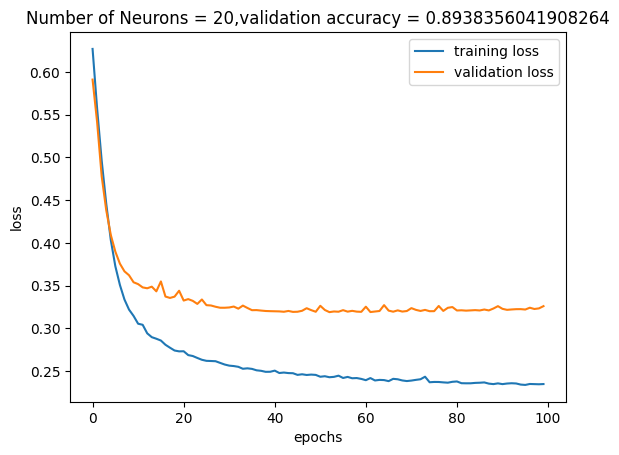

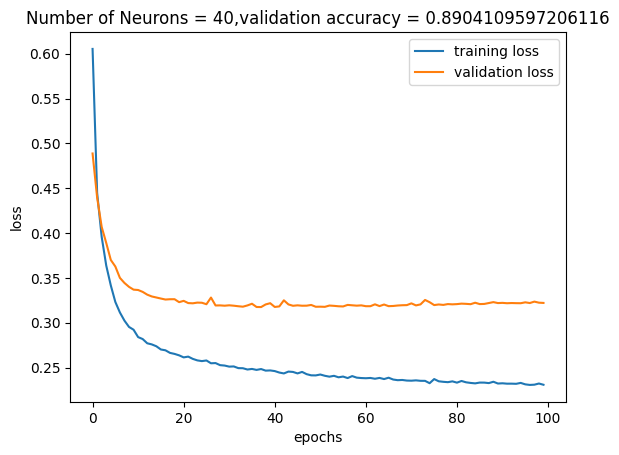

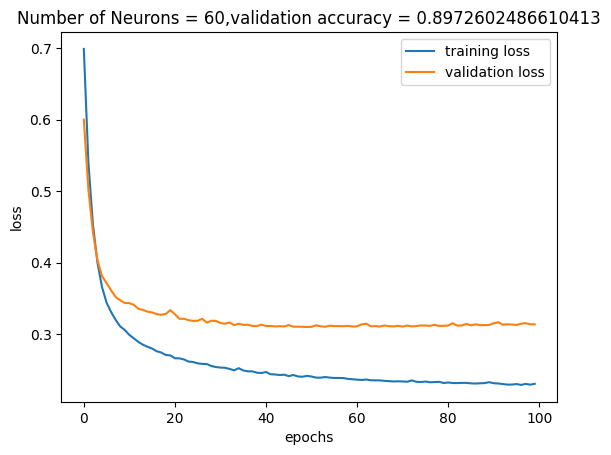

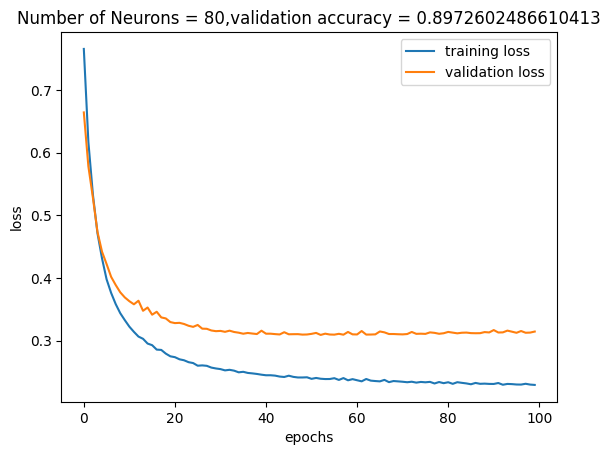

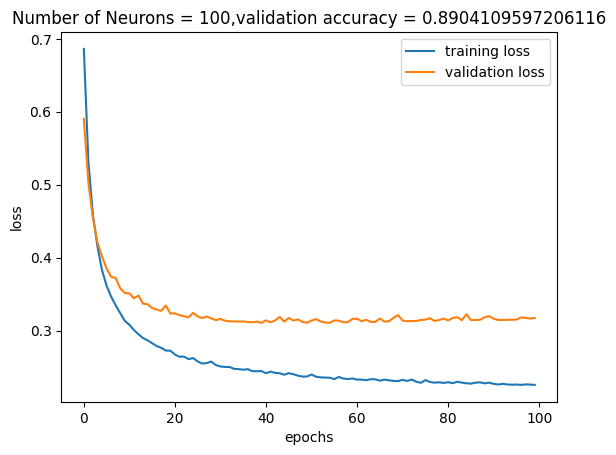

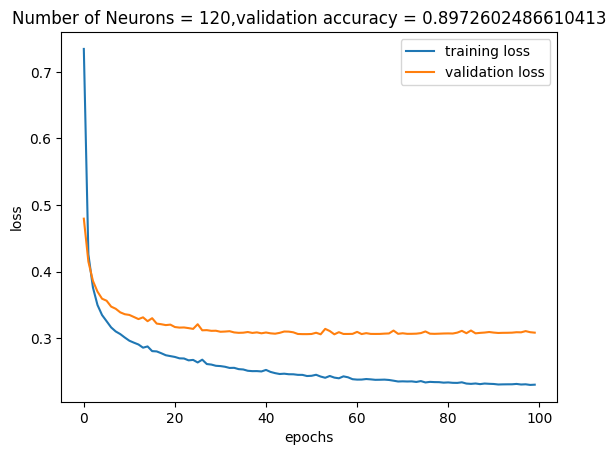

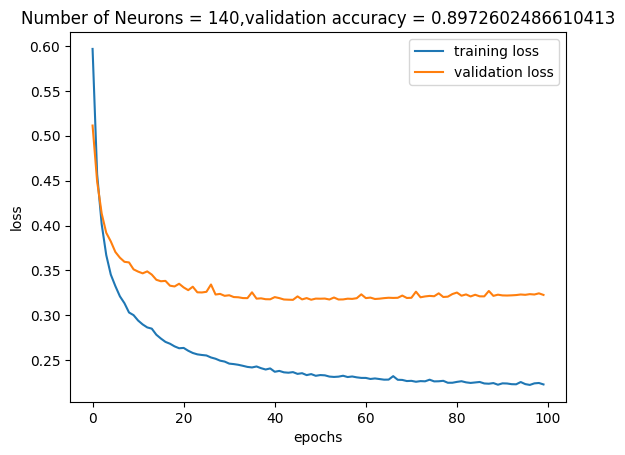

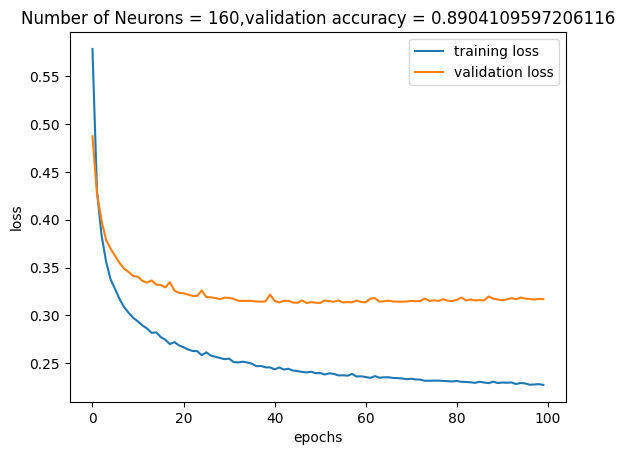

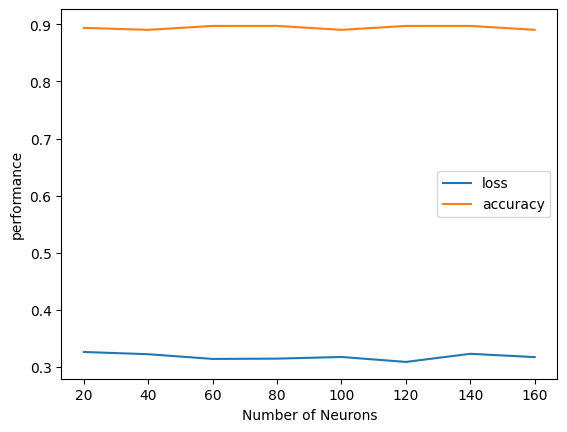

In [ ]:
#Part6-Varying Layer length(Neurons):
LR=[20,40,60,80,100,120,140,160]
loss=[]
acc=[]
for lr in LR:
    #Network Architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(lr,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal')
    ])
    initial_learning_rate = 0.01
    def lr_step_decay(epoch, lr):
        drop_rate = 0.9
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
    #Model Formation
    model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    history=model.fit(x_t, y, epochs=100,verbose=0,validation_split=0.2,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=0)])#,callbacks=[callback])#,callbacks=[callback])  
    acc.append(history.history.get('val_accuracy')[-1])
    loss.append(history.history.get('val_loss')[-1])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Number of Neurons = '+str(lr)+",validation accuracy = "+str(history.history.get('val_accuracy')[-1]))
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend(["training loss","validation loss"])
    plt.show()
plt.plot(LR,loss)
plt.plot(LR,acc)
plt.legend(["loss",'accuracy'])
plt.xlabel("Number of Neurons")
plt.ylabel('performance')
plt.show()



In [ ]:
print(*acc)
print(*loss)

0.8938356041908264 0.8904109597206116 0.8972602486610413 0.8972602486610413 0.8904109597206116 0.8972602486610413 0.8972602486610413 0.8904109597206116
0.3260122537612915 0.32207468152046204 0.3138423562049866 0.31435683369636536 0.3172605335712433 0.3085835874080658 0.32278940081596375 0.3170347213745117


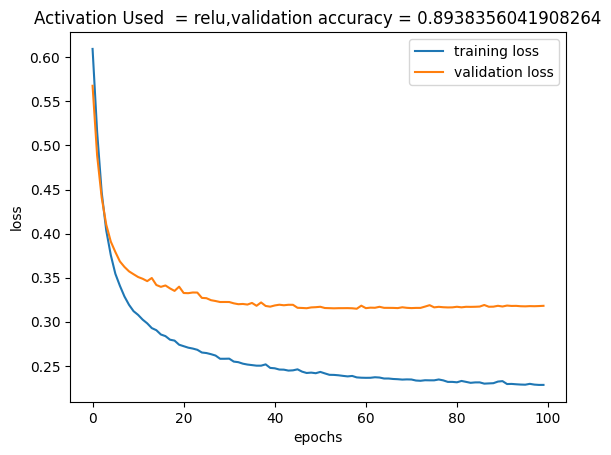

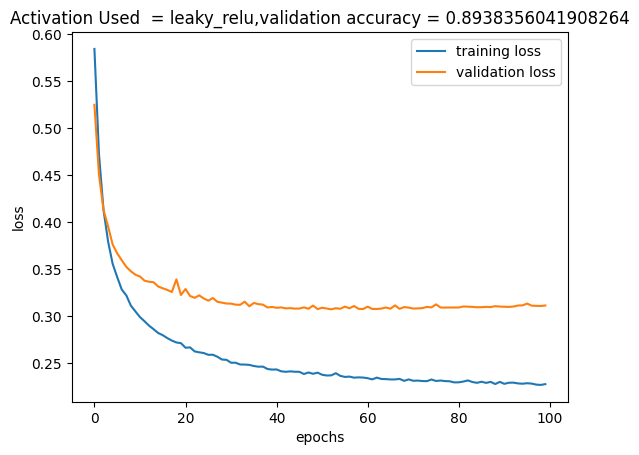

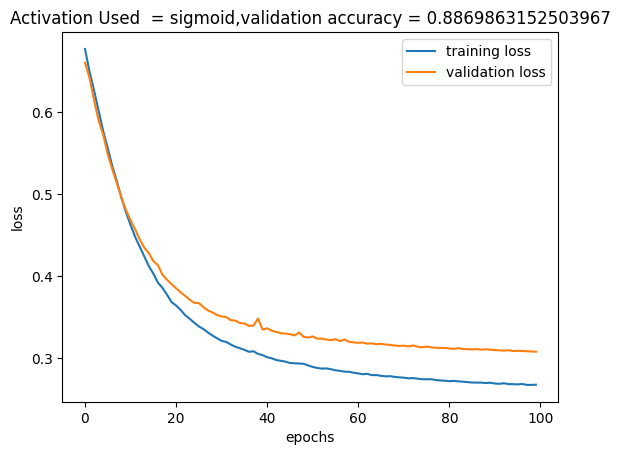

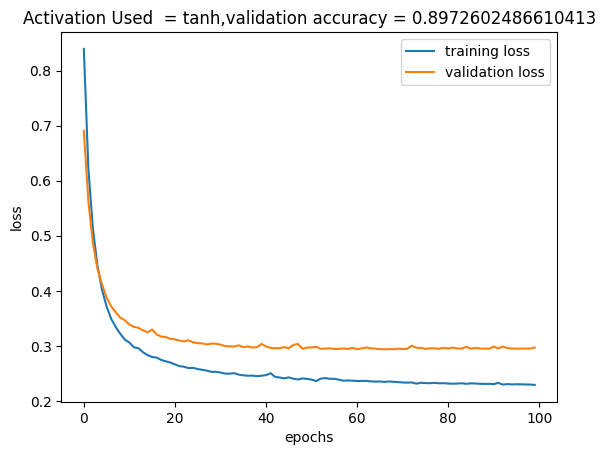

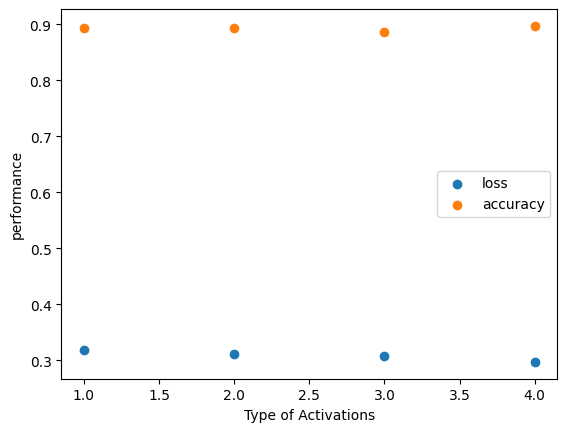

In [ ]:
#Part7-Varying Layer Activation:
activations=['relu','leaky_relu','sigmoid','tanh']
loss=[]
acc=[]
for lr in activations:
    #Network Architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(60,activation=lr,use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.Dropout(.5),
        #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
        tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal')
    ])
    initial_learning_rate = 0.01
    def lr_step_decay(epoch, lr):
        drop_rate = 0.9
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
    #Model Formation
    model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    history=model.fit(x_t, y, epochs=100,verbose=0,validation_split=0.2,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=0)])#,callbacks=[callback])#,callbacks=[callback])  
    acc.append(history.history.get('val_accuracy')[-1])
    loss.append(history.history.get('val_loss')[-1])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Activation Used  = '+str(lr)+",validation accuracy = "+str(history.history.get('val_accuracy')[-1]))
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend(["training loss","validation loss"])
    plt.show()
plt.scatter([1,2,3,4],loss)
plt.scatter([1,2,3,4],acc)
plt.legend(["loss",'accuracy'])
plt.xlabel("Type of Activations")
plt.ylabel('performance')
plt.show()



In [ ]:
print(*loss)
print(*acc)

0.3180667459964752 0.3114537000656128 0.3080540895462036 0.2969543933868408
0.8938356041908264 0.8938356041908264 0.8869863152503967 0.8972602486610413



Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/100
37/37 [==============================] - 1s 6ms/step - loss: 0.6950 - accuracy: 0.5591 - val_loss: 0.5873 - val_accuracy: 0.7671 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.8065 - val_loss: 0.4811 - val_accuracy: 0.8459 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8519 - val_loss: 0.4254 - val_accuracy: 0.8527 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8622 - val_loss: 0.3981 - val_accuracy: 0.8459 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - lo

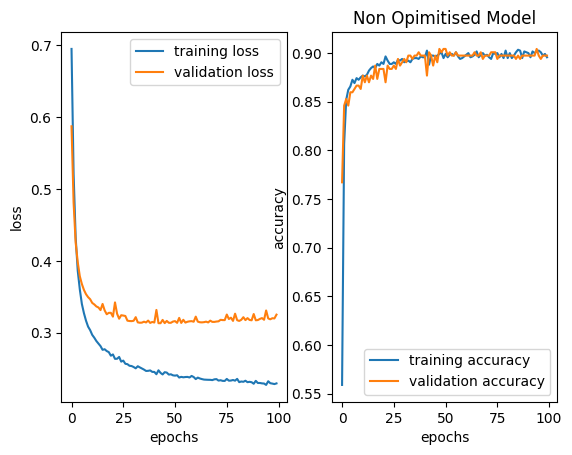

In [ ]:
#Part 8:Non Optimal Model in part2:
#Network Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'),
    #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
    #tf.keras.layers.Dropout(.5),
    #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
    #tf.keras.layers.Dropout(.5),
    #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
    #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
    #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
    tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal')
])
#learning Rate Schedule
initial_learning_rate = 0.01
def lr_step_decay(epoch, lr):
    drop_rate = 0.9
    epochs_drop = 10.0
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
#Model Formation
model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
             loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=['accuracy'])
history=model.fit(x_t, y, epochs=100,verbose=1,validation_split=0.2,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=1)])#,callbacks=[callback])#,callbacks=[callback])  
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.xlabel("epochs")
plt.ylabel('loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.xlabel("epochs")
plt.ylabel('accuracy')
plt.title("Non Opimitised Model")
plt.show()



Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/100
37/37 [==============================] - 1s 7ms/step - loss: 0.8389 - accuracy: 0.3759 - val_loss: 0.7372 - val_accuracy: 0.4589 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.6113 - val_loss: 0.6196 - val_accuracy: 0.6884 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5582 - accuracy: 0.7620 - val_loss: 0.5351 - val_accuracy: 0.7808 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4795 - accuracy: 0.8116 - val_loss: 0.4770 - val_accuracy: 0.8082 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - lo

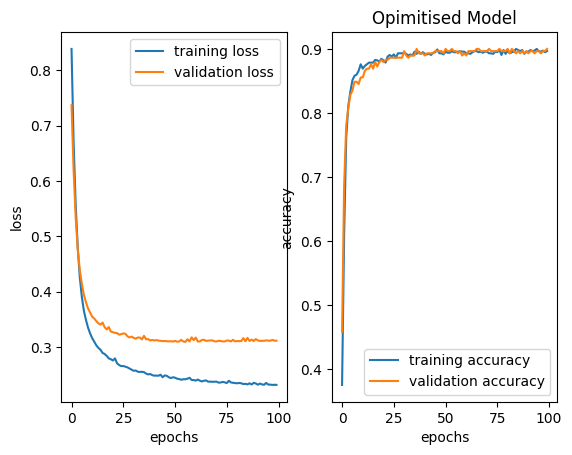

In [ ]:
#Part 8:Optimal Model:
#Network Architecture
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,min_delta=10**-5,mode="auto")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(60,activation='leaky_relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'),
    #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
    #tf.keras.layers.Dropout(.5),
    #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
    #tf.keras.layers.Dropout(.5),
    #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
    #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
    #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
    tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal')
])
#learning Rate Schedule
initial_learning_rate = 0.01
def lr_step_decay(epoch, lr):
    drop_rate = 0.9
    epochs_drop = 10.0
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
#Model Formation
model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
             loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=['accuracy'])
history=model.fit(x_t, y, epochs=100,verbose=1,validation_split=0.2,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=1)])#,callbacks=[callback])#,callbacks=[callback])  
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.xlabel("epochs")
plt.ylabel('loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.xlabel("epochs")
plt.ylabel('accuracy')
plt.title("Opimitised Model")
plt.show()


In [ ]:
#Part 9 Performance on Testing Data:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_t,y,test_size=0.2)
#Part 8 Confusion Matrix:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_t, y, test_size=0.2)
#Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(60,activation='leaky_relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal'),
    #tf.keras.layers.Dense(40,activation='leaky_relu',use_bias='HeNormal',bias_initializer='HeNormal'),
    #tf.keras.layers.Dropout(.5),
    #tf.keras.layers.Dense(16,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
    #tf.keras.layers.Dropout(.5),
    #tf.keras.layers.Dense(4,activation='relu',use_bias=True,kernel_initializer='HeNormal',bias_initializer='zeros'),
    #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
    #tf.keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones',),
    tf.keras.layers.Dense(1,activation='sigmoid',use_bias=True,kernel_initializer='HeNormal',bias_initializer='HeNormal')
])
#learning Rate Schedule
initial_learning_rate = 0.01
def lr_step_decay(epoch, lr):
    drop_rate = 0.9
    epochs_drop = 10.0
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
#Model Formation
model.compile(tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),
             loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=['accuracy'])
history=model.fit(X_train, Y_train, epochs=100,verbose=1,callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=1)])#,callbacks=[callback])#,callbacks=[callback]) 
loss,acc=model.evaluate(X_test,Y_test)
print("accuracy = ",100*acc)
print("loss = ",loss)
y_g=model.predict(X_test)
y_g.reshape(y_g.shape[0])
yhat=np.zeros(y_g.shape)
for i in range(len(y_g)):
    if y_g[i]>=0.5:
        yhat[i]=1

#Confusion Matrix
y_actu = pd.Series(Y_test.reshape(Y_test.shape[0]), name='Actual')
y_pred = pd.Series(yhat.reshape(Y_test.shape[0]), name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion



Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 0.6264 - accuracy: 0.7466 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.8271 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.8442 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8536 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8613 - lr: 0.0100

Epoch 6: LearningRateScheduler setting learning rate to 0.01.
Epoch 6/100
37/37 [==============================] - 0s 2ms/st

Predicted,0.0,1.0
Actual,,
0.0,134,12
1.0,14,132
